<a href="https://colab.research.google.com/github/Fyodor-DOs/PCVK_02_Ahmed-Fathir-Syafaat/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODUL 10 – Global Thresholding
## NAMA  : AHMED FATHIR SYAFAAT
## KELAS : TI - 3H

## TUGAS PRAKTIKUM

1. Akses google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Import library

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,820 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
import cv2 as cv
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170

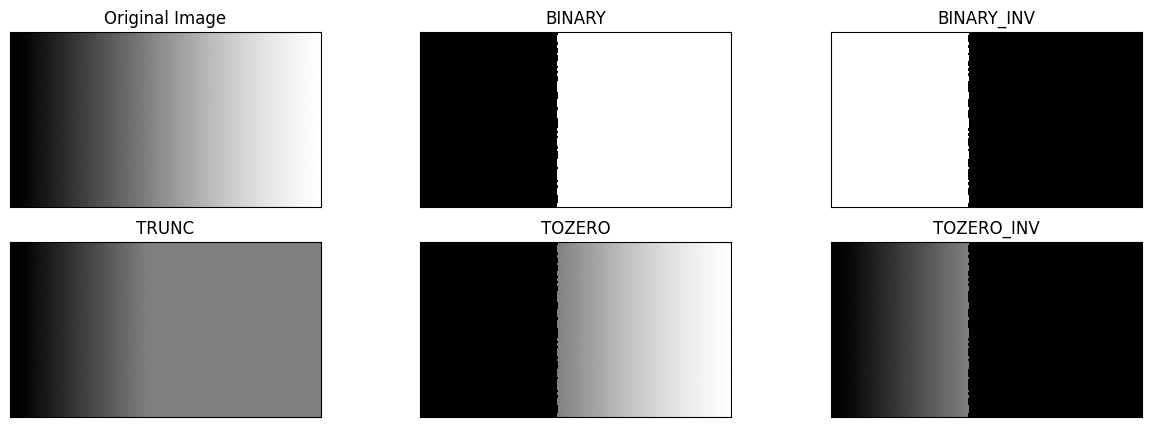

In [ ]:
filename = ('/content/drive/MyDrive/PCVK/Images/gradient.jpg')

gradient = cv.imread(filename)
thresh = 127 # nilai Threshold yang ditentukan

# 1. thresh1 jika pixel di gradient > 127, maka thresh1 bernilai 1 (putih) selain itu bernilai 0 (hitam)
ret,thresh1 = cv.threshold(gradient,thresh,255,cv.THRESH_BINARY)
# 2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(gradient,thresh,255,cv.THRESH_BINARY_INV)
# 3. Threshold Truncate
ret,thresh3 = cv.threshold(gradient,thresh,255,cv.THRESH_TRUNC)
# 4. Threshold Tozero
ret,thresh4 = cv.threshold(gradient,thresh,255,cv.THRESH_TOZERO)
# 5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(gradient,thresh,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [gradient, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1), plt.imshow(images[i], 'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()


4. Buat Otsu Thresholding tanpa menggunakan Library.

167


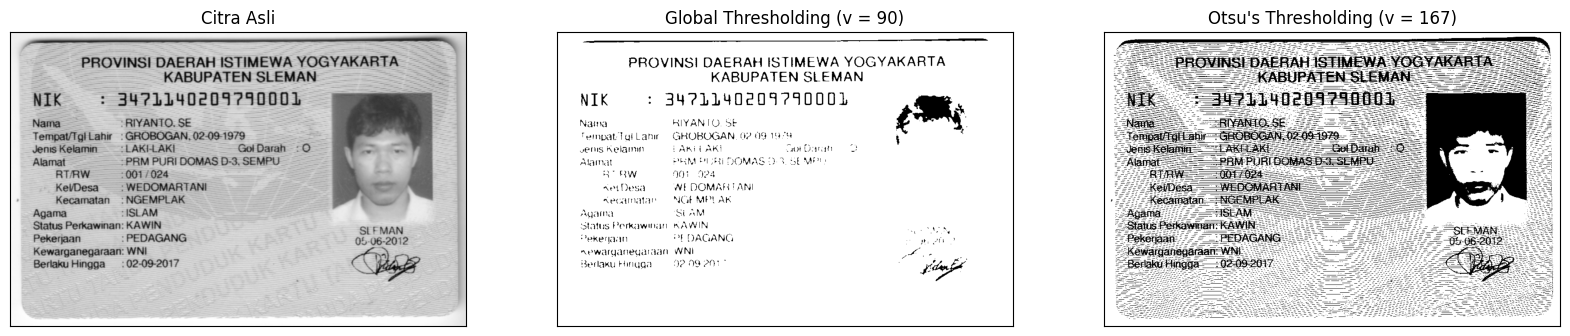

In [ ]:
filename = ('/content/drive/MyDrive/PCVK/Images/ktp_riyanto.png')
img = cv.imread(filename,0)
blur = cv.GaussianBlur(img,(5,5),0)

def otsu(gray):
  pixel_number = gray.shape[0] * gray.shape[1]
  mean_weight = 1.0/pixel_number
  his, bins = np.histogram(gray, np.arange(0,257))
  final_thresh = -1
  final_value = -1
  intensity_arr = np.arange(256)
  for t in bins[1:-1]: # This goes from 1 to 254 uint8 range (Pretty sure wont be those values)
    pcb = np.sum(his[:t])
    pcf = np.sum(his[t:])
    Wb = pcb * mean_weight
    Wf = pcf * mean_weight
    mub = np.sum(intensity_arr[:t]*his[:t]) / float(pcb)
    muf = np.sum(intensity_arr[t:]*his[t:]) / float(pcf)
    #print mub, muf
    value = Wb * Wf * (mub - muf) ** 2
    if value > final_value:
      final_thresh = t
      final_value = value
  final_img = gray.copy()
  print(final_thresh)
  final_img[gray > final_thresh] = 255
  final_img[gray < final_thresh] = 0
  # Return both the processed image and the threshold value
  return final_img, final_thresh

otsu_biner, otsu_thresh = otsu(img)
x = ("Otsu's Thresholding (v = ")+str(otsu_thresh)+")"
ret,th1 = cv.threshold(blur,90,255,cv.THRESH_BINARY)
#ret,th2 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)
titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [blur, th1, otsu_biner]
plt.figure(figsize = (20,15))
for i in range(len(citra3)):
  plt.subplot(1,3,i+1),plt.imshow(citra3[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder images.
Petunjuk:

- anda dapat gunakan cv.calcHist untuk menampilkan histogram.

- Buka link berikut https://opencv-tutorial.readthedocs.io/en/latest/histogram/histogram.html

- Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter yaitu mask. Jika diset None, maka keseluruhan image akan dihitung histogramnya. Jika kita tentukan mask, maka hanya bagian image yang dimasking warna putih yang akan dihitung histogramnya (dari contoh dibawah dinamakan dengan Citra Segment).

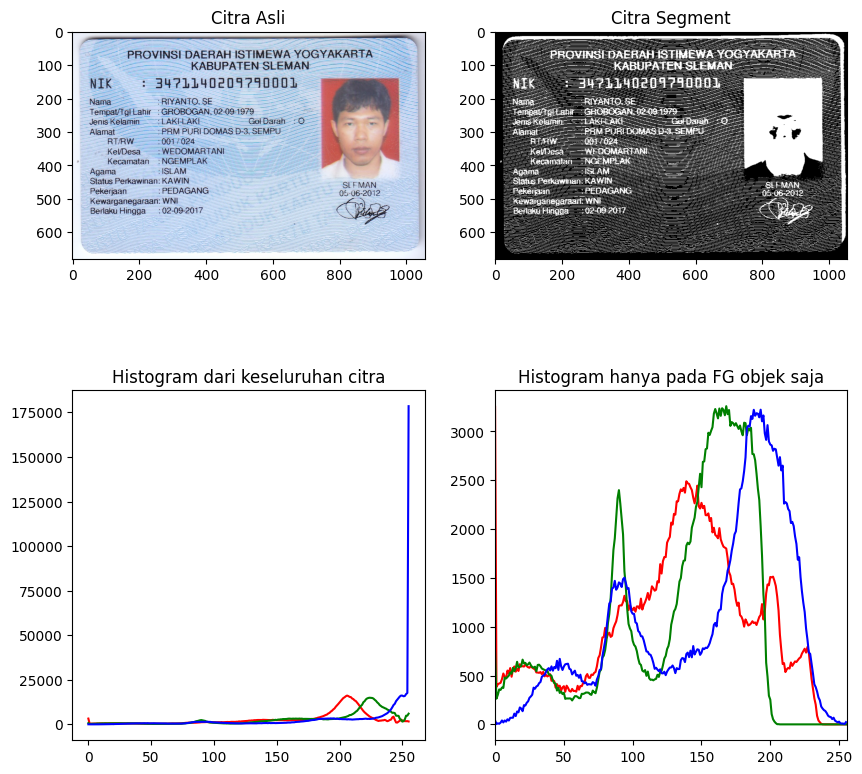

In [ ]:
filename = ('/content/drive/MyDrive/PCVK/Images/ktp_riyanto.png')
img = cv.imread(filename)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

ret3,mask = cv.threshold(img_gray,200,255,cv.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')
for i,col in enumerate(color):
  hist0 = cv.calcHist([img],[i],None,[256],[0,256])
  plt.subplot(2,2,3),plt.plot(hist0,color = col)
  plt.title('Histogram dari keseluruhan citra')
  hist1 = cv.calcHist([img],[i],mask,[256],[0,256])
  plt.subplot(2,2,4),plt.plot(hist1,color = col)
  plt.title('Histogram hanya pada FG objek saja')
  plt.xlim([0,256])
plt.show()

6. Lakukan segmentasi warna pada image " ktp Riyanto.jpg ", munculkan hanya warna yang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya warna tertentu saja)

(<Axes: >, <matplotlib.image.AxesImage at 0x7c0bc27ef6d0>)

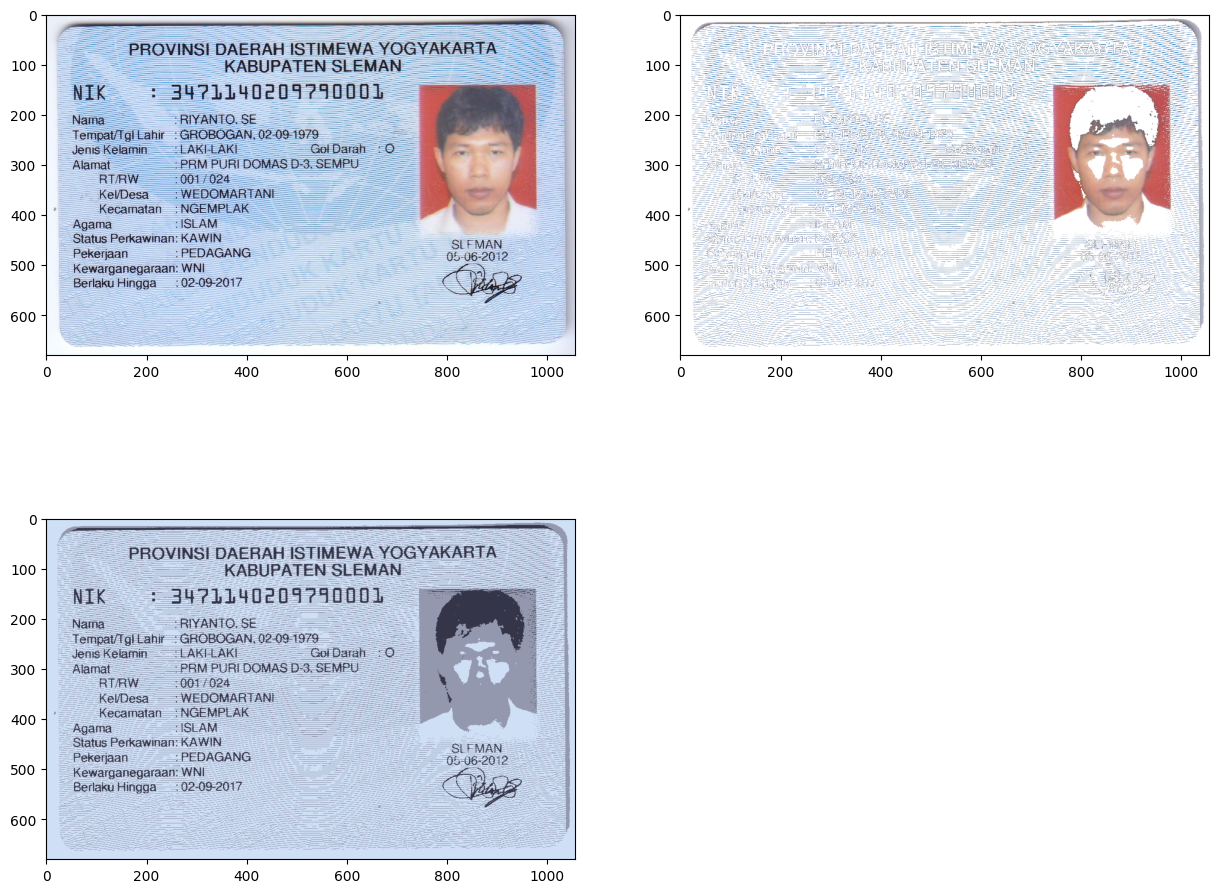

In [ ]:
img = cv.imread(filename)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

#reshape array ke bentuk 2D
pixel_values = img.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 150, 0.1)

k = 3
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

#konversi titik centroid kedalam integer
centers = np.uint8(centers)

#flattening label array
labels = labels.flatten()

#konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]

# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(img.shape)

masked_image = np.copy(img)
masked_image0 = masked_image.reshape((-1, 3))
masked_image0[labels != 1] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img.shape)

plt.figure(figsize = (15,12))
plt.subplot(2,2,1),plt.imshow(img)
plt.subplot(2,2,2),plt.imshow(masked_image0)
plt.subplot(2,2,3),plt.imshow(segmented_image)

## Berikut adalah proses konversi gambar KTP menjadi teks yang dapat mengenali tulisan.

In [3]:
import pytesseract
from pytesseract import Output
import cv2 as cv
import matplotlib.pyplot as plt

1. Install PIP OCR

In [4]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-ind is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


2. Menambahkan axis kedalam objek figure dengan method add_subplot(). kemudian kita tunjukan objek figure kita dengan method show()

In [20]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

3. Python-tesseract akan mencetak teks yang dikenali dan menyimpannya kedalam file

In [21]:
from pytesseract import Output
img = cv.imread('/content/drive/MyDrive/PCVK/Images/ktp_riyanto.jpg')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())


dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


4. Menambahkan kotak untuk deteksi teksi pada gambar

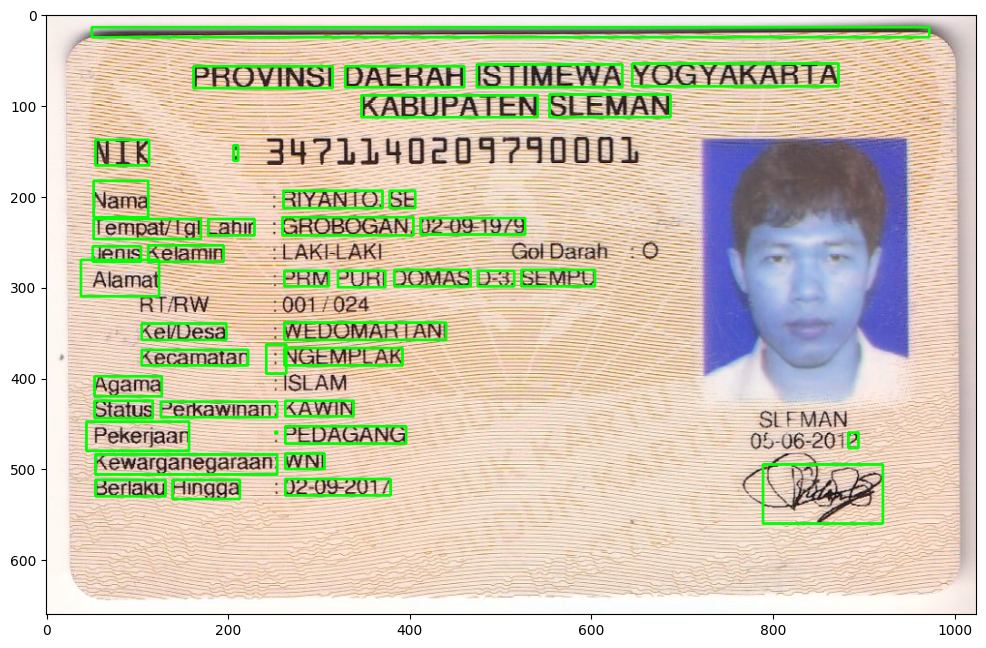

In [29]:
n_boxes = len(d['text'])
for i in range(n_boxes):
  if int(d['conf'][i]) > 60:
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    img = cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
display(img)

5. Hasil pembacaan KTP Menjadi text

    level  page_num  block_num  par_num  line_num  word_num  left  top  width  \
0       1         1          0        0         0         0     0    0   1024   
1       2         1          1        0         0         0    50   14    922   
2       3         1          1        1         0         0    50   14    922   
3       4         1          1        1         1         0    50   14    922   
4       5         1          1        1         1         1    50   14    922   
..    ...       ...        ...      ...       ...       ...   ...  ...    ...   
93      5         1          6        1         1         4   263  511    116   
94      2         1          7        0         0         0   789  495    132   
95      3         1          7        1         0         0   789  495    132   
96      4         1          7        1         1         0   789  495    132   
97      5         1          7        1         1         1   789  495    132   

    height  conf        tex

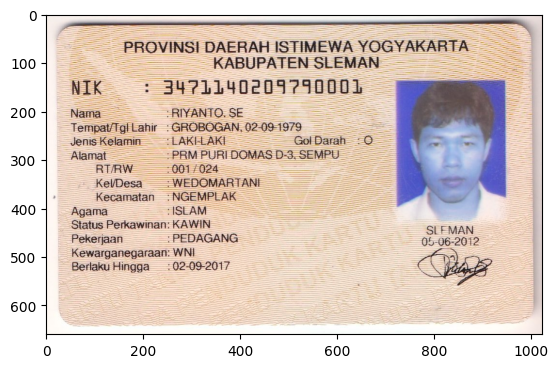

In [40]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/ktp_riyanto.jpg')

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
th, threshed = cv.threshold(gray, 127, 255, cv.THRESH_TRUNC)
text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="ind")

text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()

plt.imshow(img)
print(text1)
print(text2)

## Tugasnya adalah mengimplementasikan hasil citra yang telah diproses dengan GLOBAL THRESHOLDING dan hasilnya diproses untuk membaca teks yang terdapat pada KTP.

In [44]:
import pytesseract
from pytesseract import Output
import cv2 as cv
import matplotlib.pyplot as plt

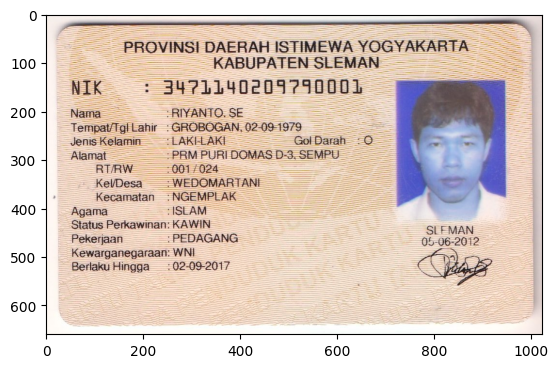

In [54]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/ktp_riyanto.jpg')
plt.imshow(img)
plt.show()

In [55]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blurred = cv.GaussianBlur(gray, (5, 5), 0) # Penerapan Gaussian Blur untuk mengurangi noise

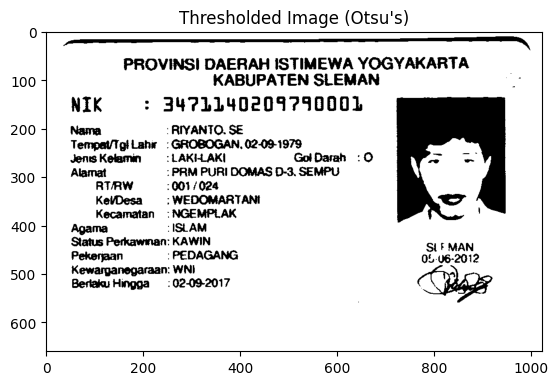

In [56]:
_, threshed = cv.threshold(blurred, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
plt.imshow(threshed, cmap='gray')
plt.title("Thresholded Image (Otsu's)")
plt.show()

In [60]:
# Proses dilasi untuk memperjelas huruf
kernel = cv.getStructuringElement(cv.MORPH_RECT, (2, 2))
dilated = cv.dilate(threshed, kernel, iterations=1)

In [58]:
text_data = pytesseract.image_to_data(dilated, output_type=Output.DICT)
text_string = pytesseract.image_to_string(dilated, lang="ind")

In [59]:
n_boxes = len(text_data['text'])
for i in range(n_boxes):
    if int(text_data['conf'][i]) > 60:
        (x, y, w, h) = (text_data['left'][i], text_data['top'][i],
                        text_data['width'][i], text_data['height'][i])
        img = cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

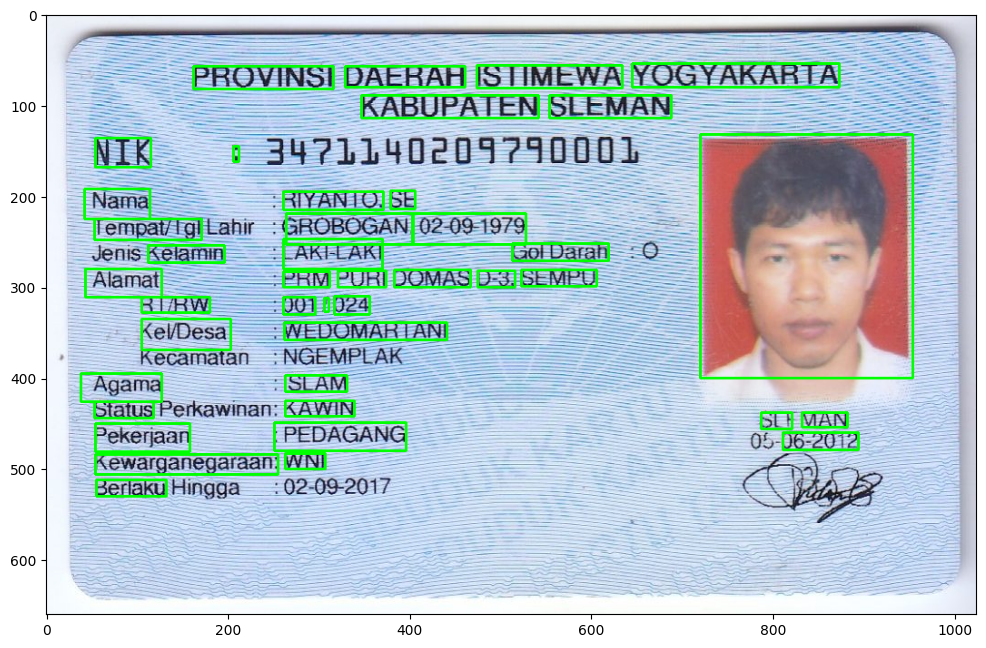

————————— www www

PROVINSI DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN

NIK : 3481140209790001

Nama RIYANTO. SE

Tempat/Tgi Lahr GROBOGAN. 02-99-1979

Jenis Kelamin LAKI-LAKI GolDarah 0

Alamat PRM PURI DOMAS D-3. SEMPU
RTRW 0601 1024

KelDesa : WEDOMARTANI
Kecamatan : NGEMPLAK

 

Agama ISLAM
Status Perkawnan: KAWIN
Pekerjaan PEDAGANG SL MAN

05 06-2012
Kewarganegaraan: WNI

Berlaku Hmgga 02-09-2017 U 5



In [62]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()
print(text_string)